In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
test_data[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [6]:
test_targets[0]

7.2

In [7]:
mean = train_data.mean(axis = 0)
len(mean)

13

In [8]:
mean = train_data.mean(axis = 0)
training_data = train_data-mean
std = train_data.std(axis = 0)
training_data /= std
training_targets = train_targets

testing_data = test_data - mean #we always use quantities from training data in order to normalize test data and never use any quantity computed from test data
testing_data /= std
testing_targets = test_targets

In [9]:
training_data.shape[1]

13

In [10]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) #no activation function b/c we dont want the values to be constraint between zero and one. it willl be a linear layer
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # mean squared error a widely used loss function for regression
    return model

You are also monitoring a new metric during called MAE. It is the absolute value of the difference between predicted value and the target value

In [11]:
#Using K fold because of less number of data Samples
import numpy as np
k = 4
num_val_samples = len(training_data) // k #integer division
print(num_val_samples)
num_epochs = 100
all_scores = []

101


In [12]:
for i in range(k):
    print("Processing field #", i)
    #prepairing the validation data:data from partition K
    val_data = training_data[i*num_val_samples:(i+1)*num_val_samples]      
    val_targets = training_targets[i*num_val_samples:(i+1)*num_val_samples]
    #prepairing training data from all other partitions
    partial_train_data = np.concatenate([
        training_data[:i*num_val_samples],
        training_data[(i+1)*num_val_samples:]
    ], axis = 0)
    partial_train_target = np.concatenate([
        training_targets[:i*num_val_samples],
        training_targets[(i+1)*num_val_samples:]
    ],axis = 0)
    
   
    model = build_model()
    model.fit(partial_train_data, partial_train_target,
             epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)
    

Processing field # 0
Processing field # 1
Processing field # 2
Processing field # 3


In [13]:
all_scores

[2.119223643057417, 2.2643502915259637, 2.883980311969719, 2.3768927691006425]

In [14]:
np.mean(all_scores)

2.4111117539134357

In [15]:
# now doing on 500 epochs and also keeping a record of MAE log
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = training_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = training_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [training_data[:i * num_val_samples],
         training_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [training_targets[:i * num_val_samples],
         training_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [16]:
len(all_mae_histories[1])


500

In [17]:
average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [18]:
len(average_mae_history)

500

In [19]:
average_mae_history

[4.79613472211479,
 3.3874947198546757,
 3.061064179580991,
 2.7474941499162426,
 2.7978941426418795,
 2.701966881752014,
 2.639529546888748,
 2.6311867744615762,
 2.5633249365457216,
 2.593403676948925,
 2.494403673870729,
 2.730360480818418,
 2.515659194181461,
 2.4047387885575247,
 2.4346369457716985,
 2.4282088067271923,
 2.476321812903527,
 2.441635802240655,
 2.368225863664457,
 2.4954257648770173,
 2.3873931865880986,
 2.3551356402954253,
 2.314097808139159,
 2.3441840587276044,
 2.5017445111038663,
 2.331474520192288,
 2.2929171536228443,
 2.402937134893814,
 2.3169300922072757,
 2.4441988503578864,
 2.3648776760195744,
 2.496896736692674,
 2.328195074997326,
 2.450212254382596,
 2.4291698720195507,
 2.2870129842569336,
 2.3806249304573135,
 2.325921076359135,
 2.305331001187315,
 2.3688454627990723,
 2.2733481874560364,
 2.3083629431110797,
 2.301995881713263,
 2.2875553770820694,
 2.223728331598905,
 2.47116483438133,
 2.2884732484817505,
 2.3598018306316715,
 2.3593698315101

In [20]:
#Same code as above
all_average=[]
for i in range(num_epochs):
    x1 = []
    for x in all_mae_histories:
        x1.append(x[i])
    all_average.append(np.mean(x1))    

In [21]:
len(all_average) #same as average_mae_history

500

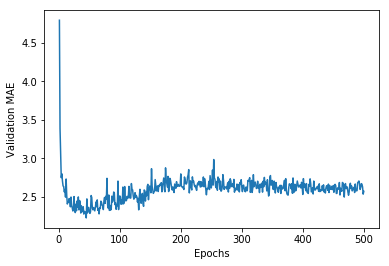

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

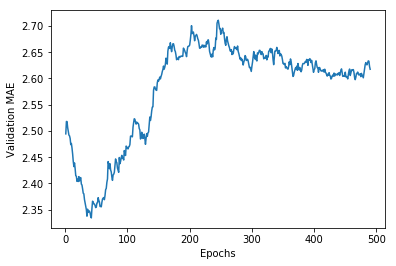

In [23]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [30]:
model = build_model()
model.fit(training_data, training_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(testing_data, testing_targets)


102/102 [==============================] - 0s 613us/step


In [31]:
test_mae_score

2.7115838667925667